In [184]:
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import umap

In [143]:
embedder = SentenceTransformer('all-MiniLM-L6-v2')

In [144]:
ds = pd.read_csv('https://raw.githubusercontent.com/LuisSante/Datasets/main/app_reviews.csv')
ds

,package_name,review,date,star
0,com.mantz_it.rfanalyzer,Great app! The new version now works on my Bra...,October 12 2016,4
1,com.mantz_it.rfanalyzer,Great It's not fully optimised and has some is...,August 23 2016,4
2,com.mantz_it.rfanalyzer,Works on a Nexus 6p I'm still messing around w...,August 04 2016,5
3,com.mantz_it.rfanalyzer,The bandwidth seemed to be limited to maximum ...,July 25 2016,3
4,com.mantz_it.rfanalyzer,Works well with my Hackrf Hopefully new update...,July 22 2016,5
...,...,...,...,...
288060,com.termux.api,it doesn't do anything after installing this i...,June 24 2016,3
288061,com.termux.api,I like this app . Its is very helpful for use....,June 20 2016,5
288062,com.termux.api,Finally Brings back the Unix command line to A...,May 20 2016,5
288063,com.termux.api,The API feature is great just need loads more...,May 05 2016,5


In [145]:
list_ = []  
for i in range(len(ds['package_name'].unique())):
    ds_aux = ds.loc[ds['package_name'] == ds['package_name'].unique()[i]]
    #rescatamos en list_ los packages names unicos de todo el dataset
    list_.append({'package_name':ds['package_name'].unique()[i], 'size': len(ds_aux)})

#ordenamos de acuerdo al numero de datos de cada package name (de mayor a menor)
list_ = sorted(list_, key=lambda x: x['size'], reverse=True)

#seleccionamos el package name # 40 y almacenamos los reviews en el corpus
df = ds[ds['package_name'] == list_[8]['package_name']]
corpus = list(df['review'])

corpus_ds = {
    'Sentences' : corpus
}

ds_new = pd.DataFrame(corpus_ds)
print(ds_new)

                                              Sentences
0                                 Authentication Morris
1     I can't access my account We couldn't verify y...
2     This app works fine Later found the secret key...
3                                     very good love it
4       Powerful app Awesome app to safe my transaction
...                                                 ...
2971                              I'm feeling very well
2972              Doesn't work  can't add any accounts.
2973  Only one concern but not sure if it was the ap...
2974                                           Verygood
2975  This is very bad and not change password and v...

[2976 rows x 1 columns]


In [179]:
corpus_embeddings = embedder.encode(corpus)
corpus_embeddings = normalize(corpus_embeddings)

In [185]:
X_principal = TSNE(n_components = 2).fit_transform(corpus_embeddings)
X_principal

c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\USUARIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[-46.17282  ,   1.6743292],
       [-47.00909  , -18.524822 ],
       [-17.569149 , -17.022354 ],
       ...,
       [-15.703174 , -10.54704  ],
       [ 24.533817 ,  51.51294  ],
       [-41.027695 ,   8.11677  ]], dtype=float32)

In [186]:
def best_cluster_agglomerative(j):
    best_k = 0
    best_average = 0
    best_cluster = []
    for k in range(2,j):

        agglomerative_clusterering = AgglomerativeClustering(n_clusters=k, affinity="cosine" , linkage='complete').fit(corpus_embeddings)
        cluster_labels = agglomerative_clusterering.fit_predict(X_principal)
        best_cluster.append(cluster_labels)

        silhouette_avg = silhouette_score(X_principal, cluster_labels)
        print("cluster: ",k)
        print("silhouette_avg: ",silhouette_avg)
        print("\n")
    
        if(silhouette_avg > best_average):
            best_average = silhouette_avg
            best_k = k

    return best_k, best_average, best_cluster[best_k-2]

In [187]:
best_k_HC, best_average_HC, best_cluster = best_cluster_agglomerative(20)
print(best_k_HC)
print(best_average_HC)
print(best_cluster)

cluster:  2
silhouette_avg:  0.40171543


cluster:  3
silhouette_avg:  0.3353776


cluster:  4
silhouette_avg:  0.39165112


cluster:  5
silhouette_avg:  0.327507


cluster:  6
silhouette_avg:  0.25476474


cluster:  7
silhouette_avg:  0.25854644


cluster:  8
silhouette_avg:  0.25090873


cluster:  9
silhouette_avg:  0.21321356


cluster:  10
silhouette_avg:  0.2029912


cluster:  11
silhouette_avg:  0.19464378


cluster:  12
silhouette_avg:  0.18277611


cluster:  13
silhouette_avg:  0.16644804


cluster:  14
silhouette_avg:  0.16043742


cluster:  15
silhouette_avg:  0.14626235


cluster:  16
silhouette_avg:  0.14119296


cluster:  17
silhouette_avg:  0.12996042


cluster:  18
silhouette_avg:  0.12073181


cluster:  19
silhouette_avg:  0.113439664


2
0.40171543
[0 0 0 ... 0 1 0]


In [150]:
#pca = umap.UMAP(n_components = 2, metric='cosine')
#X_principal = pca.fit_transform(corpus_embeddings)

In [188]:
clustering_model = AgglomerativeClustering(n_clusters=best_k_HC, affinity="cosine" , linkage='complete') #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(X_principal)
cluster_assignment = clustering_model.labels_
ds_new['clusters'] = cluster_assignment
print(cluster_assignment)

[0 0 0 ... 0 1 0]


In [189]:
ds_new = ds_new.sort_values(by=['clusters','Sentences'])
ds_new = ds_new.reset_index(drop=True)
ds_new

,Sentences,clusters
0,&gt;:( !!!!!!!!!!!!! YOU NEED A COMPUTER!!!!!!...,0
1,+ Ease of use UI compatibility,0
2,2 good,0
3,2 step Great back up App to the security codes...,0
4,2F Does the job nicely.,0
...,...,...
2971,Ótima segurança porém.. Ótimo método de segur...,1
2972,Установил Google Authenticator на телефон свя...,1
2973,يجب دمجه مع google service,1
2974,❤❤❤ Love the dark this mode 😍. It would be gre...,1


In [159]:
count = 0
for i in ds_new['Sentences'][ds_new['clusters'] == 0]:
    print(count , i ,end="\n")
    count+=1

0 50:50 Love the idea when it works. Sometimes doesn't work!!
1 Abbas Loved. It
2 Adds U2F support to Chrome that works with my Yubikey NEO. I don't need it for OTPs  just adding U2F support  but it still works great
3 After some stupid update  Barcode Scanner Broke After some update  it keeps saying """"""""Barcode scanner not available now"""""""". Now I can't add new accounts 😡""
4 Alright.
5 Anuj kumar Good
6 Authy Helps me out
7 Awesome
8 Awesome Read the title
9 Awesome Very useful app. No surprises whatsoever
10 Awesome but had a little bit bug on digital code showing
11 Backup problem. People think that the 2 factor authentication codes are linked to the Google account so when you sign in from another device all the 2 factor codes appear but that's not the case. One needs to be rooted to make a backup with titanium backup and restore to the new Android device in order to get the 2 factor codes on a new smart phone or tablet. I hope Google is working on a better way to move the 

             x         y  labels
0     0.034373 -0.031797      29
1    -0.321402 -0.288815      35
2    -0.375964  0.067066      22
3     0.498591  0.094147       7
4    -0.216110  0.278182      38
...        ...       ...     ...
2971  0.357641 -0.028145      28
2972 -0.184143 -0.281882      12
2973 -0.285152 -0.044600      31
2974  0.490178  0.134998       7
2975 -0.162442 -0.103392       0

[2976 rows x 3 columns]


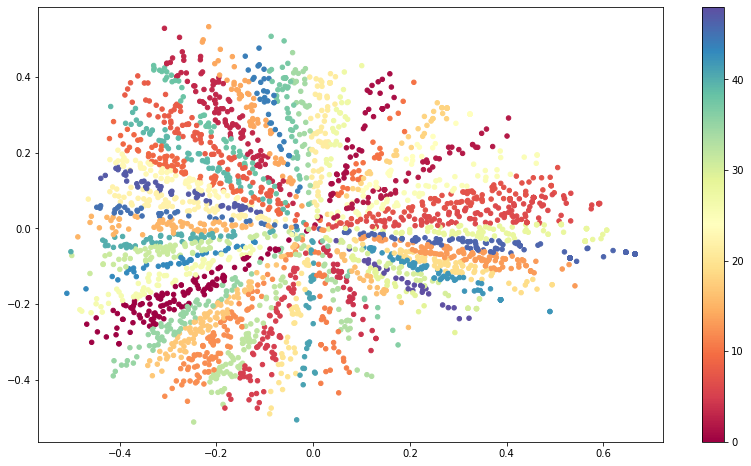

In [160]:
point_size = 100.0 / np.sqrt(corpus_embeddings.shape[0])

result = pd.DataFrame(X_principal, columns=['x', 'y'])
result['labels'] = clustering_model.labels_
print(result)

fig, ax = plt.subplots(figsize=(14, 8))
clustered = result[result.labels != -1]
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=20, cmap='Spectral')
plt.colorbar()
plt.show()